## EDA and Summarizing

In [18]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

def summarize_dataframe(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum().values*100
    summary_df['missing%'] = (df.isna().sum().values*100)/len(df)
    summary_df['uniques'] = df.nunique().values
    summary_df['first_value'] = df.iloc[0].values
    summary_df['last_value'] = df.iloc[len(df)-1].values
    summary_df['count'] = df.count().values
    desc = pd.DataFrame(df.describe().T)
    summary_df['min'] = desc['min']
    summary_df['max'] = desc['max']
    summary_df['mean'] = desc['mean']
    return summary_df


In [19]:
games = pd.read_csv("games.csv")
summarize_dataframe(games).style.background_gradient(cmap='Purples')


,dtypes,missing#,missing%,uniques,first_value,last_value,count,min,max,mean
gameId,int64,0,0.000000,136,2022090800,2022110700,136,2022090800.000000,2022110700.000000,2022098922.117647
season,int64,0,0.000000,1,2022,2022,136,2022.000000,2022.000000,2022.000000
week,int64,0,0.000000,9,1,9,136,1.000000,9.000000,4.845588
gameDate,object,0,0.000000,27,09/08/2022,11/07/2022,136,nan,nan,nan
gameTimeEastern,object,0,0.000000,8,20:20:00,20:15:00,136,nan,nan,nan
homeTeamAbbr,object,0,0.000000,32,LA,NO,136,nan,nan,nan
visitorTeamAbbr,object,0,0.000000,32,BUF,BAL,136,nan,nan,nan
homeFinalScore,int64,0,0.000000,38,10,13,136,3.000000,49.000000,22.669118
visitorFinalScore,int64,0,0.000000,35,31,27,136,0.000000,48.000000,20.948529


In [20]:
players = pd.read_csv("players.csv")
summarize_dataframe(players).style.background_gradient(cmap='Purples')


,dtypes,missing#,missing%,uniques,first_value,last_value,count,min,max,mean
nflId,int64,0,0.000000,1683,25511,55241,1683,25511.000000,55241.000000,48221.702317
height,object,0,0.000000,16,6-4,6-2,1683,nan,nan,nan
weight,int64,0,0.000000,179,225,280,1683,153.000000,380.000000,245.724302
birthDate,object,47900,28.461081,985,1977-08-03,nan,1204,nan,nan,nan
collegeName,object,0,0.000000,226,Michigan,Coastal Carolina,1683,nan,nan,nan
position,object,0,0.000000,19,QB,DT,1683,nan,nan,nan
displayName,object,0,0.000000,1672,Tom Brady,C.J. Brewer,1683,nan,nan,nan


In [21]:
plays = pd.read_csv("plays.csv")
summarize_dataframe(plays).style.background_gradient(cmap='Purples')


,dtypes,missing#,missing%,uniques,first_value,last_value,count,min,max,mean
gameId,int64,0,0.000000,136,2022100908,2022102308,12486,2022090800.000000,2022110700.000000,2022098953.855598
playId,int64,0,0.000000,3974,3537,905,12486,54.000000,5096.000000,1986.603476
ballCarrierId,int64,0,0.000000,480,48723,54572,12486,25511.000000,55158.000000,48072.271664
ballCarrierDisplayName,object,0,0.000000,480,Parker Hesse,Dameon Pierce,12486,nan,nan,nan
playDescription,object,0,0.000000,12486,(7:52) (Shotgun) M.Mariota pass short middle to P.Hesse to 50 for 9 yards (K.Neal).,(12:51) C.Heck reported in as eligible. D.Pierce up the middle to LV 14 for 3 yards (D.Perryman; D.Deablo).,12486,nan,nan,nan
quarter,int64,0,0.000000,5,4,2,12486,1.000000,5.000000,2.550136
down,int64,0,0.000000,4,1,3,12486,1.000000,4.000000,1.727054
yardsToGo,int64,0,0.000000,32,10,1,12486,1.000000,38.000000,8.469085
possessionTeam,object,0,0.000000,32,ATL,HOU,12486,nan,nan,nan
defensiveTeam,object,0,0.000000,32,TB,LV,12486,nan,nan,nan


In [22]:
tackles = pd.read_csv("tackles.csv")
summarize_dataframe(tackles).style.background_gradient(cmap='Purples')


,dtypes,missing#,missing%,uniques,first_value,last_value,count,min,max,mean
gameId,int64,0,0.000000,136,2022090800,2022091901,17426,2022090800.000000,2022110700.000000,2022098971.441123
playId,int64,0,0.000000,3943,101,3845,17426,54.000000,5096.000000,1982.974578
nflId,int64,0,0.000000,800,42816,46199,17426,33131.000000,55241.000000,47602.719442
tackle,int64,0,0.000000,2,1,0,17426,0.000000,1.000000,0.569207
assist,int64,0,0.000000,2,0,0,17426,0.000000,1.000000,0.315276
forcedFumble,int64,0,0.000000,2,0,0,17426,0.000000,1.000000,0.005681
pff_missedTackle,int64,0,0.000000,2,0,1,17426,0.000000,1.000000,0.119936


### Best tackling player

In [23]:
tracking_data = pd.concat([pd.read_csv(f'tracking_week_{week}.csv') for week in range(1, 10)])
summarize_dataframe(tracking_data).style.background_gradient(cmap='Purples')


,dtypes,missing#,missing%,uniques,first_value,last_value,count,min,max,mean
gameId,int64,0,0.000000,136,2022090800,2022110700,12187398,2022090800.000000,2022110700.000000,2022099002.717871
playId,int64,0,0.000000,3974,56,3787,12187398,54.000000,5096.000000,1981.028187
nflId,float64,53006000,4.349247,1683,35472.000000,nan,11657338,25511.000000,55241.000000,47459.700224
displayName,object,0,0.000000,1673,Rodger Saffold,football,12187398,nan,nan,nan
frameId,int64,0,0.000000,164,1,44,12187398,1.000000,164.000000,25.511774
time,object,0,0.000000,488149,2022-09-08 20:24:05.200000,2022-11-07 23:06:49.599999,12187398,nan,nan,nan
jerseyNumber,float64,53006000,4.349247,99,76.000000,nan,11657338,1.000000,99.000000,48.947584
club,object,0,0.000000,33,BUF,football,12187398,nan,nan,nan
playDirection,object,0,0.000000,2,left,right,12187398,nan,nan,nan
x,float64,0,0.000000,22592,88.370000,26.490000,12187398,-3.550000,122.960000,60.413032


In [24]:
# Merge relevant data based on gameId, playId, and nflId
merged_data = pd.merge(plays, tackles, on=['gameId', 'playId'])
merged_data.head()


,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.981955,NaN,NaN,NaN,NaN,43306,1,0,0,0
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,-0.263424,NaN,NaN,NaN,NaN,44872,1,0,0,0
2,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,-0.263424,NaN,NaN,NaN,NaN,47855,0,0,0,1
3,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,1.133666,NaN,NaN,NaN,NaN,47843,1,0,0,0
4,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,-0.043580,NaN,NaN,NaN,NaN,53509,0,1,0,0


In [25]:
merged_data = pd.merge(merged_data, players, left_on='nflId', right_on='nflId', suffixes=('_play', '_player'))
merged_data.head()


,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,tackle,assist,forcedFumble,pff_missedTackle,height,weight,birthDate,collegeName,position,displayName
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,1,0,0,0,6-1,216,1995-07-26,Florida,FS,Keanu Neal
1,2022110609,84,47853,Darrell Henderson,(14:50) D.Henderson right guard to LA 32 for 5...,1,2,10,LA,TB,...,0,1,0,0,6-1,216,1995-07-26,Florida,FS,Keanu Neal
2,2022102301,1016,53555,Chuba Hubbard,(11:29) (No Huddle) C.Hubbard right guard to T...,2,1,10,CAR,TB,...,1,0,0,0,6-1,216,1995-07-26,Florida,FS,Keanu Neal
3,2022110609,879,52460,Cam Akers,(:58) (No Huddle) C.Akers right tackle to LA 2...,1,3,1,LA,TB,...,0,1,0,0,6-1,216,1995-07-26,Florida,FS,Keanu Neal
4,2022102700,97,46155,Mark Andrews,(14:18) (Shotgun) L.Jackson pass short right t...,1,1,10,BAL,TB,...,0,1,0,0,6-1,216,1995-07-26,Florida,FS,Keanu Neal


In [26]:
merged_data = pd.merge(merged_data, tracking_data, on=['gameId', 'playId', 'nflId'])


In [27]:
merged_data.info()
# merged_data.head(1500).to_csv('merged_data_smample.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804159 entries, 0 to 804158
Data columns (total 60 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   gameId                            804159 non-null  int64  
 1   playId                            804159 non-null  int64  
 2   ballCarrierId                     804159 non-null  int64  
 3   ballCarrierDisplayName            804159 non-null  object 
 4   playDescription                   804159 non-null  object 
 5   quarter                           804159 non-null  int64  
 6   down                              804159 non-null  int64  
 7   yardsToGo                         804159 non-null  int64  
 8   possessionTeam                    804159 non-null  object 
 9   defensiveTeam                     804159 non-null  object 
 10  yardlineSide                      793277 non-null  object 
 11  yardlineNumber                    804159 non-null  i

In [28]:
merged_data


,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,TB,left,54.34,26.85,3.70,4.40,0.35,74.93,76.36,NaN
1,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,TB,left,54.74,26.96,4.25,3.98,0.41,82.76,75.59,pass_arrived
2,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,TB,left,55.18,27.04,4.66,3.32,0.45,82.01,78.00,NaN
3,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,TB,left,55.67,27.17,5.12,2.94,0.50,79.00,76.37,NaN
4,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,TB,left,56.19,27.29,5.44,2.28,0.53,75.55,76.44,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804154,2022100912,2514,47911,Tony Pollard,(2:46) M.Farniok reported in as eligible. T.P...,3,1,10,DAL,LA,...,LA,left,101.36,18.75,2.24,1.38,0.23,325.45,260.59,tackle
804155,2022100912,2514,47911,Tony Pollard,(2:46) M.Farniok reported in as eligible. T.P...,3,1,10,DAL,LA,...,LA,left,101.11,18.82,2.21,1.69,0.27,331.03,269.75,NaN
804156,2022100912,2514,47911,Tony Pollard,(2:46) M.Farniok reported in as eligible. T.P...,3,1,10,DAL,LA,...,LA,left,100.90,18.82,1.98,2.96,0.21,320.20,271.57,NaN
804157,2022100912,2514,47911,Tony Pollard,(2:46) M.Farniok reported in as eligible. T.P...,3,1,10,DAL,LA,...,LA,left,100.64,18.99,1.81,3.48,0.31,332.01,281.27,NaN


### Standardize Directional Data

Make the offense team always running towards the right (increasing X direction)

When analyzing player tracking data, it is often preferable to standardize all plays to a consistent direction of offense to simplify analysis and model training. We standardized the direction of plays so that all offensive actions are represented as moving from left to right, regardless of their original direction. 

This is achieved by flipping the player orientation and direction angles, as well as their x and y coordinates on the field, whenever the play is originally directed towards the left. This standardization is crucial for ensuring that subsequent data analysis and machine learning models can interpret and learn from the data consistently, without bias from the original offensive direction.

In [29]:
import numpy as np

def reverse_deg(deg):
    if deg < 180:
        return deg + 180
    if deg >= 180:
        return deg - 180


In [30]:
merged_data["o_standard"]=np.where(merged_data["playDirection"] == "left", merged_data["o"].apply(reverse_deg), merged_data["o"])

merged_data["dir_standard"] = np.where(merged_data["playDirection"] == "left", merged_data["dir"].apply(reverse_deg), merged_data["dir"])

merged_data["x_standard"] = np.where(merged_data["playDirection"] == "left", merged_data["x"].apply(lambda x: 120 - x), merged_data["x"])

merged_data["y_standard"] =np.where(merged_data["playDirection"] == "left",  merged_data["y"].apply(lambda y: 160/3 - y), merged_data["y"])


In [31]:
merged_data.head(1000).to_csv('merged_data_sample.csv', index=False)
merged_data.to_csv('data.csv', index=False)


In [32]:
data = pd.read_csv('data.csv')
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


yardlineSide            10882
passResult             558678
passLength             581397
penaltyYards           767841
offenseFormation           95
defendersInTheBox         173
passProbability         20028
expectedPointsAdded        90
foulName1              769318
foulName2              802660
foulNFLId1             769318
foulNFLId2             802660
birthDate              175521
event                  736180
dtype: int64


In [33]:
def height_to_cm(height_str):
    feet, inches = map(int, height_str.split('-'))
    return (feet * 30.48) + (inches * 2.54)

data['height'] = data['height'].apply(height_to_cm)
data['weight'] = data['weight'] * 0.453592

def calculate_bmi(weight_kg, height_cm):
    height_m = height_cm / 100
    return weight_kg / (height_m ** 2)

data['BMI'] = data.apply(lambda data: calculate_bmi(data['weight'], data['height']), axis=1)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# Selecting features and target variable
features = ['BMI', 'position', 'quarter', 'down', 'yardsToGo',
            'possessionTeam', 'defensiveTeam','x_standard', 'y_standard',
            's', 'a', 'dir_standard', 'o_standard']
target = 'tackle'  # Assuming 'tackle' column indicates if a tackle occurred

# Filtering the dataframe
feature_df = data[features].copy()
target_df = data[target].fillna(0)  # Filling missing values in target with 0 (no tackle)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_df, target_df, test_size=0.2, random_state=42)

# Preprocessing pipelines for both numerical and categorical data
numeric_features = ['BMI','quarter', 'down', 'yardsToGo','x_standard', 'y_standard',
            's', 'a', 'dir_standard', 'o_standard']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['position', 'possessionTeam', 'defensiveTeam']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Applying the preprocessing to the training data
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Initializing the logistic regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Training the model
logreg_model.fit(X_train_prepared, y_train)

# Predicting on the test set
y_pred = logreg_model.predict(X_test_prepared)
y_pred_proba = logreg_model.predict_proba(X_test_prepared)[:, 1]  # Probabilities for the positive class

# Evaluating the model
classification_report_output = classification_report(y_test, y_pred)
roc_auc_score_output = roc_auc_score(y_test, y_pred_proba)

print(classification_report_output)
print("ROC-AUC Score:", roc_auc_score_output)


              precision    recall  f1-score   support

           0       0.57      0.58      0.58     79343
           1       0.59      0.59      0.59     81489

    accuracy                           0.58    160832
   macro avg       0.58      0.58      0.58    160832
weighted avg       0.58      0.58      0.58    160832

ROC-AUC Score: 0.6139923444818903


In [39]:
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Training the model
rf_model.fit(X_train_prepared, y_train)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test_prepared)
y_pred_proba_rf = rf_model.predict_proba(X_test_prepared)[:, 1]

# Evaluating the model
classification_report_rf = classification_report(y_test, y_pred_rf)
roc_auc_score_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(classification_report_rf)
print("ROC-AUC Score for Random Forest:", roc_auc_score_rf)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79343
           1       1.00      1.00      1.00     81489

    accuracy                           1.00    160832
   macro avg       1.00      1.00      1.00    160832
weighted avg       1.00      1.00      1.00    160832

ROC-AUC Score for Random Forest: 0.9999840619136295


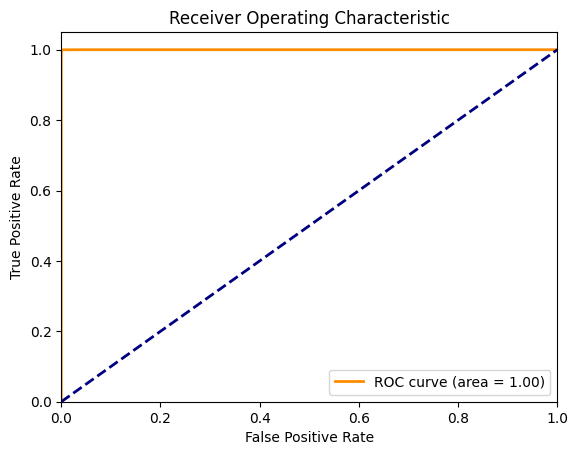

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
